In [1]:
using Plots
using QuadGK
using Roots
include("./ring_np_num.jl")
gr()

Plots.GRBackend()

In [2]:
dir = "more_players_no_inc/"
filenames = readdir(dir);
filenames = [file for file in filenames if file[end] == '2']

213-element Array{String,1}:
 "a=1.0_b=1.0_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.0_c=0.0_angCut=3.141592653589793_Pc=4_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.0_c=0.0_angCut=3.141592653589793_Pc=8_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.1_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.1_c=0.0_angCut=3.141592653589793_Pc=4_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.1_c=0.0_angCut=3.141592653589793_Pc=8_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.2_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.2_c=0.0_angCut=3.141592653589793_Pc=4_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.2_c=0.0_angCut=3.141592653589793_Pc=8_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.3_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.3_c=0.0_angCut=3.141592653589793_Pc=4_dt=1.0_games=1000_steps=100.jld2"
 "a=1.0_b=1.3_c=0.0_angCut=3.14159265358979

In [3]:
b_array = []
player_array = []
share_array = []
match_array = []

for filename in filenames
    result = load_sim(dir*filename)
    b = result[2].b
    p = result[2].player_count
    push!(b_array, b)
    push!(player_array, p)
    push!(share_array, result[1][1])
    push!(match_array, result[1][2])
end

sorted = sortperm(player_array)

b_array = reshape(b_array[sorted], :, 3)'
player_array = reshape(player_array[sorted], :, 3)'
share_array = reshape(share_array[sorted], :, 3)
match_array = reshape(match_array[sorted], :, 3)

#sorted2 = sortperm(player_array[1,:])

#b_array = b_array[:, sorted2]
#player_array = player_array[:, sorted2]
#share_array = share_array[sorted2, :]
#match_array = match_array[sorted2, :];

In [4]:
player_array

3×71 LinearAlgebra.Adjoint{Any,Array{Any,2}}:
  4   4   4   4   4   4   4   4   4  …   4   4   4   4   4   4   4   4   4
  8   8   8   8   8   8   8   8   8      8   8   8   8   8   8   8   8   8
 16  16  16  16  16  16  16  16  16     16  16  16  16  16  16  16  16  16

In [5]:
b_array

3×71 LinearAlgebra.Adjoint{Any,Array{Any,2}}:
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7  …  7.4  7.5  7.6  7.7  7.8  7.9  8.0
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7     7.4  7.5  7.6  7.7  7.8  7.9  8.0
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7     7.4  7.5  7.6  7.7  7.8  7.9  8.0

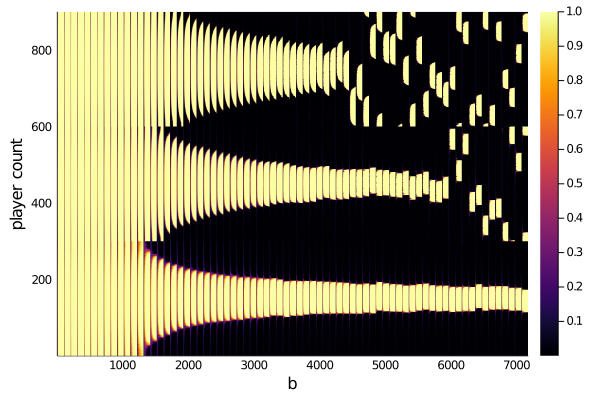

In [6]:
test_share = hvcat(71, share_array...)
heatmap(test_share, xlabel="b", ylabel="player count")

In [37]:
b_array[2, 28]

3.7

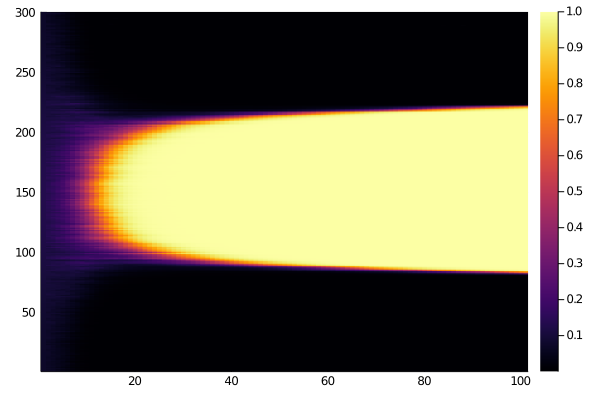

In [39]:
heatmap(share_array[28, 2])

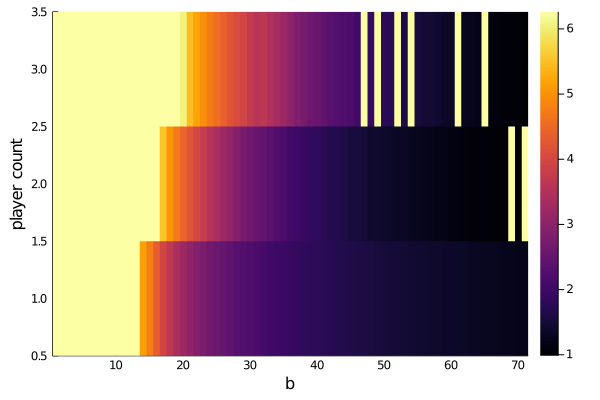

In [8]:
function simple_fitting(ϕ, p, threshold=0.5)
    places = p.>threshold
    larger_range = ϕ[places]
    if length(larger_range) == 0
        return 0, 0
    else
        return larger_range[1], larger_range[end]
    end
end;

widths = zeros(size(share_array))

ϕ_res = size(share_array[1])[1]
ϕ = LinRange(0,2π, ϕ_res+1)[1:end-1]

for (i, x) in enumerate(share_array)
    params = simple_fitting(ϕ, x[:,end])
    widths[i] = (params[2] - params[1])
end


heatmap(widths', xlabel="b", ylabel="player count")

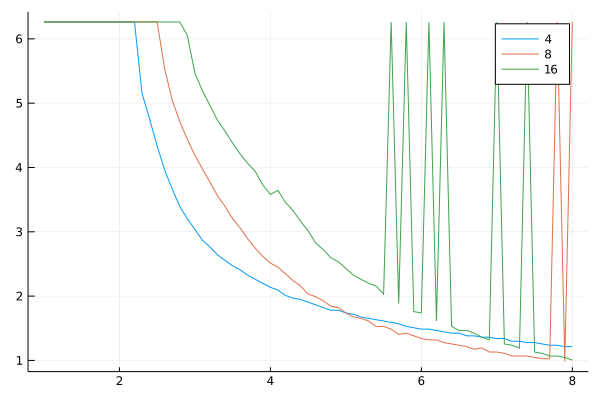

In [9]:
plot(1:0.1:8, widths, labels=[4 8 16])

In [17]:
b_array

3×71 LinearAlgebra.Adjoint{Any,Array{Any,2}}:
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7  …  7.4  7.5  7.6  7.7  7.8  7.9  8.0
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7     7.4  7.5  7.6  7.7  7.8  7.9  8.0
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7     7.4  7.5  7.6  7.7  7.8  7.9  8.0

In [10]:
dir2 = "more_players_high_prob/"
filenames2 = readdir(dir2);
filenames2 = [file for file in filenames2 if (file[end] == '2')]

57-element Array{String,1}:
 "a=1.0_b=1.0_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=1.2_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=1.4_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=1.6_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=1.8_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=2.0_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=2.2_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=2.4_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=2.6_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=2.8_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=3.0_c=0.0_angCut=3.141592653589793_Pc=16_dt=1.5_games=1000_steps=100.jld2"
 "a=1.0_b=3.2_c=0.0_angCut=3.14159265

In [11]:
b_array2 = []
player_array2 = []
share_array2 = []
match_array2 = []

for filename in filenames2
    result = load_sim(dir2*filename)
    b = result[2].b
    p = result[2].player_count
    if result[2].dt==1
        push!(b_array2, b)
        push!(player_array2, p)
        push!(share_array2, result[1][1])
        push!(match_array2, result[1][2])
    end
end

sorted2 = sortperm(b_array2)

b_array2 = b_array2[sorted2]
player_array2 = player_array2[sorted2]
share_array2 = share_array2[sorted2]
match_array2 = match_array2[sorted2]

#sorted2 = sortperm(player_array[1,:])

#b_array = b_array[:, sorted2]
#player_array = player_array[:, sorted2]
#share_array = share_array[sorted2, :]
#match_array = match_array[sorted2, :];

In [12]:
b_array2

21-element Array{Any,1}:
 4.0
 4.2
 4.4
 4.6
 4.8
 5.0
 5.2
 5.4
 5.6
 5.8
 6.0
 6.2
 6.4
 6.6
 6.8
 7.0
 7.2
 7.4
 7.6
 7.8
 8.0

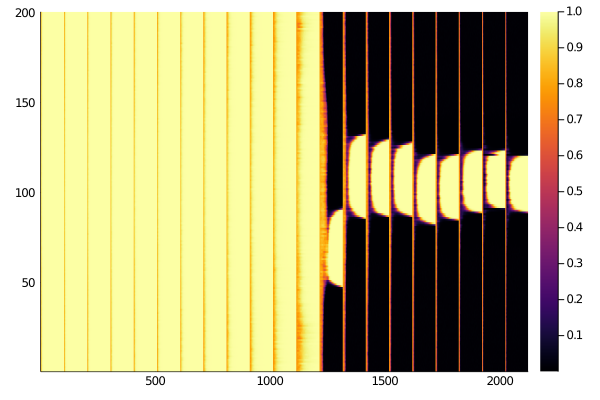

In [13]:
test_2 = hcat(share_array2...)
heatmap(test_2)

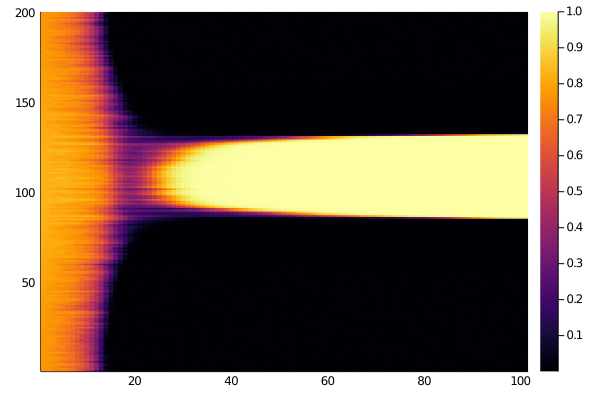

In [27]:
heatmap(share_array2[14])

In [15]:
heatmap

heatmap (generic function with 1 method)

In [29]:
b_array2[12]

6.2

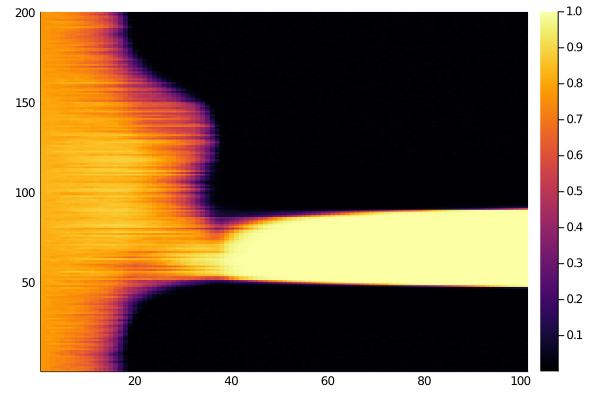

In [16]:
heatmap(share_array2[13])